#  Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# filter Warnings
import warnings
warnings.filterwarnings('ignore')

# Read the dataset

In [4]:
df = pd.read_csv('D:/ML_Pred/predictive_maintenance.csv')

In [5]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [6]:
df.sample(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
3768,3769,L50948,L,302.2,311.0,1555,34.2,185,0,No Failure
120,121,L47300,L,298.9,308.7,1433,44.7,108,0,No Failure
1673,1674,M16533,M,298.1,307.8,1384,43.7,200,0,No Failure
4386,4387,L51566,L,301.9,309.7,1719,31.9,0,0,No Failure
249,250,L47429,L,298.0,308.3,1405,56.2,218,1,Overstrain Failure
9846,9847,L57026,L,298.3,309.0,1339,58.8,35,0,No Failure
9593,9594,L56773,L,299.1,310.2,1352,52.8,41,0,No Failure
2995,2996,L50175,L,300.5,309.8,1550,37.4,148,0,No Failure
3724,3725,M18584,M,302.3,311.2,1507,47.7,70,0,No Failure
3356,3357,L50536,L,301.6,310.8,1355,57.8,195,1,Overstrain Failure


# Data Analysis

In [7]:
# Data Shape
df.shape

(10000, 10)

In [8]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [9]:
# Data Description
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [10]:
# Data Description of Objective Data Types
df.describe(include= 'object')

,Product ID,Type,Failure Type
count,10000,10000,10000
unique,10000,3,6
top,L57163,L,No Failure
freq,1,6000,9652


In [ ]:
# Check Null values in Data set
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [12]:
# Check Duplicate values In the Dataset
df.duplicated().sum()

np.int64(0)

In [ ]:
# Droping Unnecessary Columns
df.drop(df.columns[:2], axis=1, inplace= True)

In [14]:
# Check Dataset Shape Again
df.shape

(10000, 8)

In [ ]:
# Filtering Categorical Columns
cat_cols= df.select_dtypes(include= 'O').columns.tolist()

In [16]:
# Print Categorical Columns
cat_cols

['Type', 'Failure Type']

In [17]:
# value counts for categorical columns
for col in cat_cols:
    print(df[col].value_counts())

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


In [ ]:
# Identify faulty machines with 'Target' value 1
df_f = df[df.Target==1]
df_f['Failure Type'].value_counts()

Failure Type
Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: count, dtype: int64

In [19]:
# Drop No failure Rows that shows the Failure But Actually they are not
idx= df_f[df_f['Failure Type']== 'No Failure'].index
df.drop(idx, axis=0, inplace= True)


In [ ]:
# Identify faulty machines with 'Target' value 0

df_f = df[df.Target==0]
df_f['Failure Type'].value_counts()

Failure Type
No Failure         9643
Random Failures      18
Name: count, dtype: int64

In [ ]:
# Drop No random Failure Which are not actually Failure
idx= df_f[df_f['Failure Type']== 'Random Failures'].index
df.drop(idx, axis=0, inplace= True)


In [22]:
# Shape Check
df.shape

(9973, 8)

In [23]:
# Identify numerical Columns
num_cols= df.select_dtypes(exclude='O').columns.tolist()

In [24]:
num_cols

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target']

In [25]:
# Handling the Outliers in data
df.replace([np.inf, -np.inf], np.nan, inplace= True)

# Data Visualization

In [26]:
plt.figure(figsize=(4,4))


<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

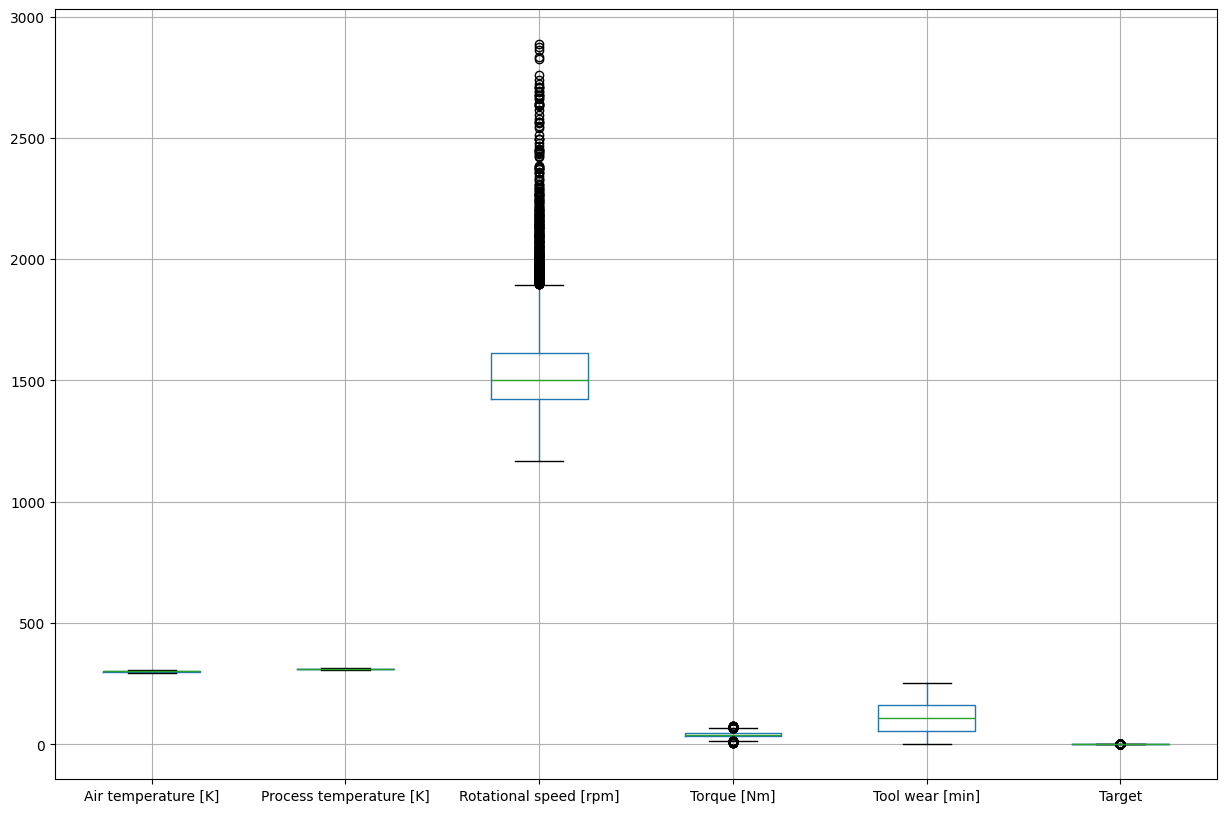

In [27]:
# Boxplot for all variables
df.boxplot(figsize= (15,10))
plt.show()

<Axes: ylabel='Rotational speed [rpm]'>

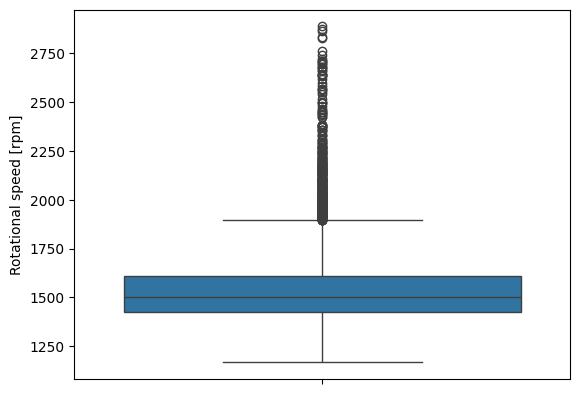

In [28]:
sns.boxplot(df['Rotational speed [rpm]'])

<Axes: xlabel='Rotational speed [rpm]', ylabel='Density'>

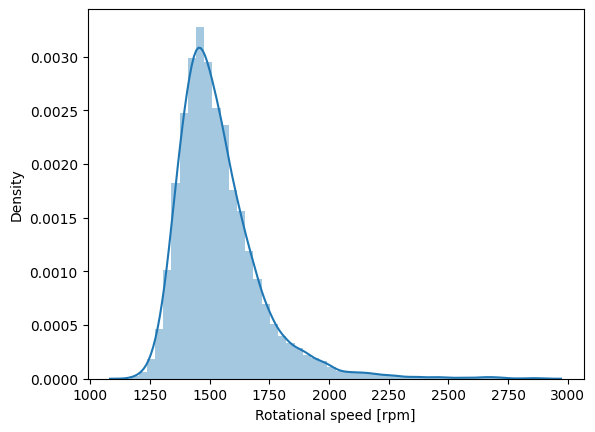

In [29]:
# Skewness of Rotational Speed
sns.distplot(df['Rotational speed [rpm]'])

This Distribution plot looks like Right Skewed

In [30]:
# Skewness value

from scipy.stats import skew

skewness = skew(df['Rotational speed [rpm]'])
print('Skewness: ', skewness)

Skewness:  1.9925593351071693


# Removing Outliers Using IQR Method

In [31]:
q1 = df['Rotational speed [rpm]'].quantile(0.25)
q3 = df['Rotational speed [rpm]'].quantile(0.75)

iqr = q3- q1

In [32]:
lower_limit = q1- 1.5 * iqr
upper_limit = q3 +1.5 * iqr

df = df[(df['Rotational speed [rpm]'] >= lower_limit) &
        (df['Rotational speed [rpm]'] <= upper_limit)]

In [33]:
df.shape

(9555, 8)

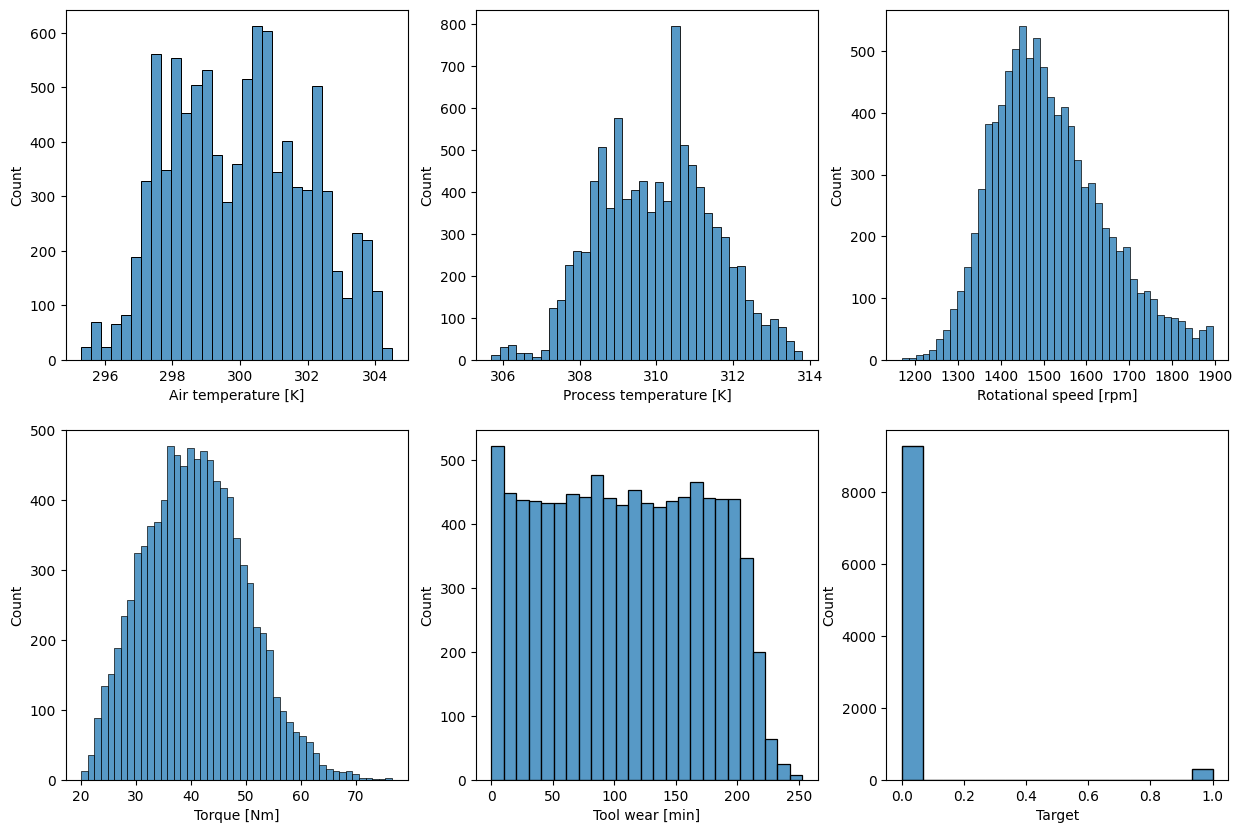

In [34]:
# Pair Plot
plt.figure(figsize= (15,10))

for i, col in  enumerate(num_cols, 1):
    plt.subplot(2,3,i)
    sns.histplot(data= df, x= col)
plt.show()

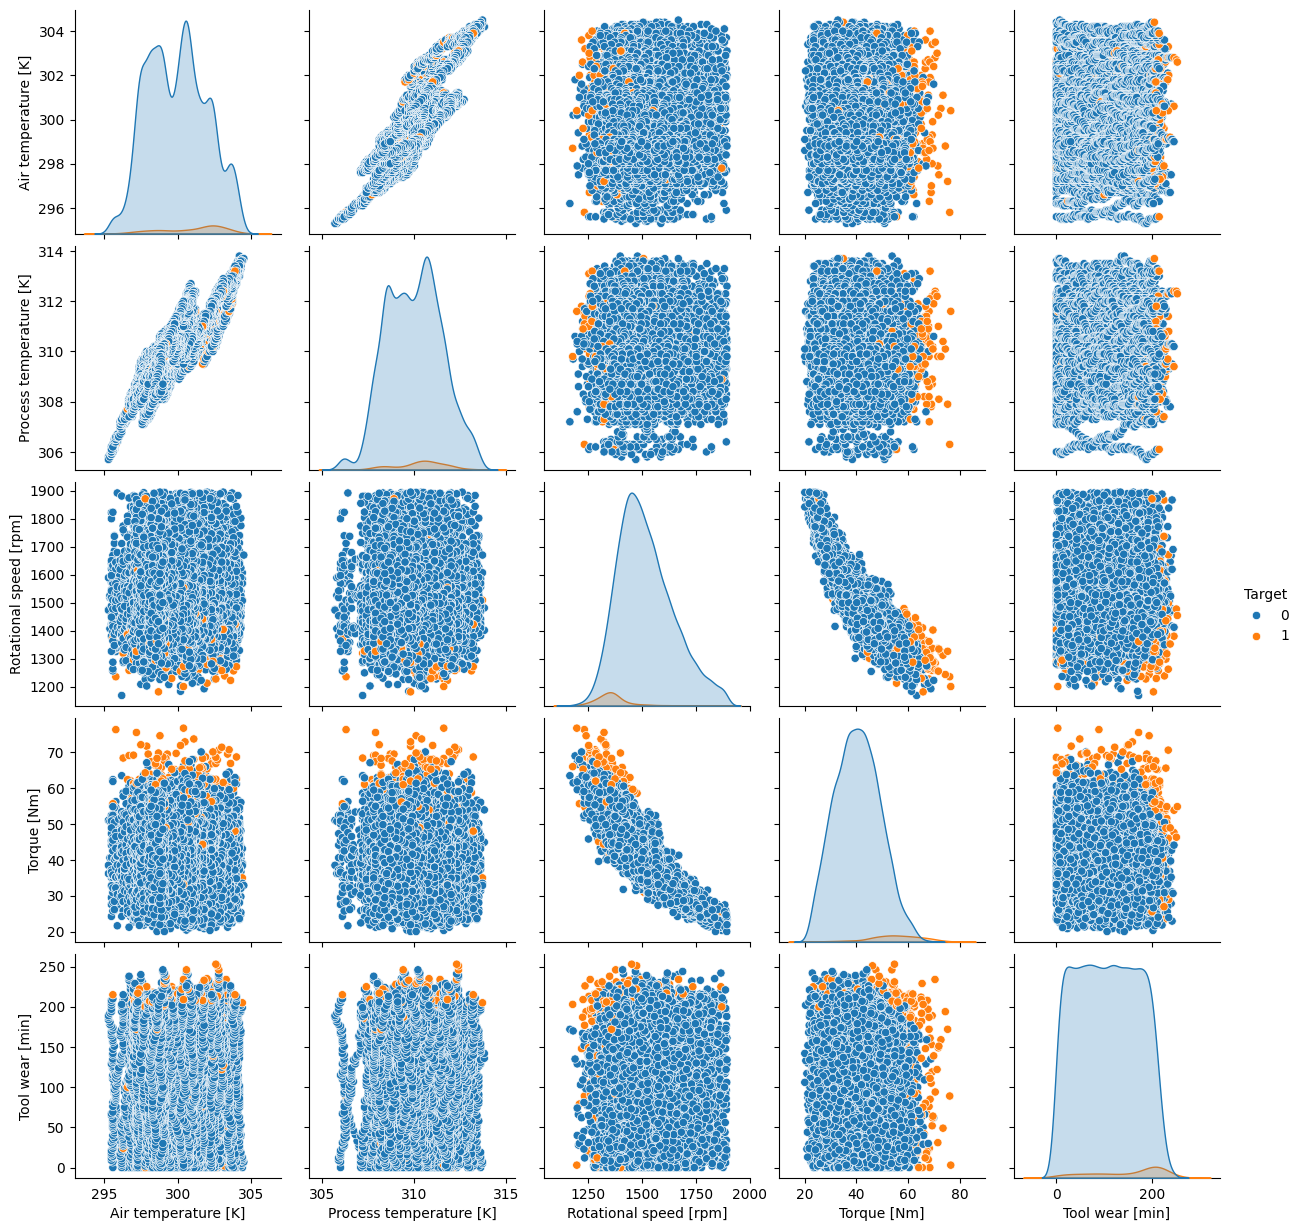

In [35]:
# pairplot
sns.pairplot(df, hue= 'Target')
plt.show()

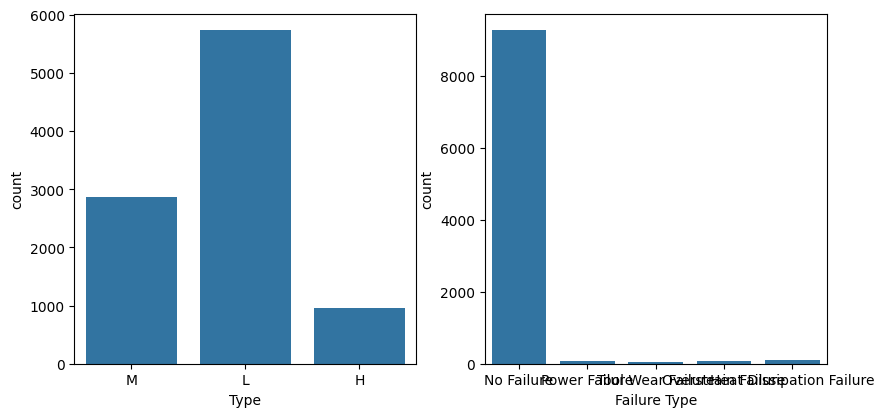

In [36]:
plt.figure(figsize= (15,10))

for i, col in  enumerate(cat_cols, 1):
    plt.subplot(2,3,i)
    sns.countplot(data= df, x= col)
plt.show()

<Axes: >

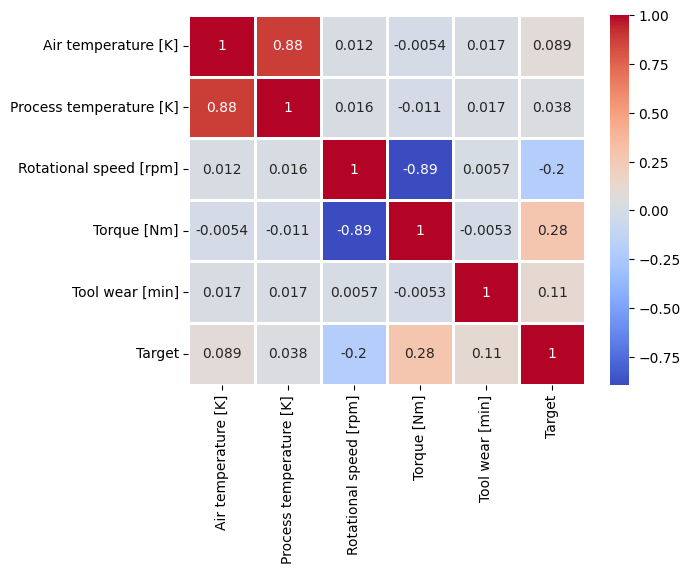

In [37]:
sns.heatmap(df.corr(numeric_only= True), annot= True, cmap= 'coolwarm', linewidths=2)

In [38]:
# Preparing data for model Training

x= df.drop(['Target', 'Failure Type'], axis= 1)
y= df['Target']

In [39]:

from sklearn.model_selection import train_test_split

In [40]:
# Splitting Data Into Train and test
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [41]:
# Filtering the Categorical and Numerical Features for the Further Analysis and Operations
cat_cols= X_train.select_dtypes(include= "O").columns.tolist()
num_cols= X_train.select_dtypes(exclude= "O").columns.tolist()

In [42]:
cat_cols

['Type']

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [44]:
# Column Transformation For the Numerical and categorical features
enc= OneHotEncoder(handle_unknown= 'ignore')
sc= StandardScaler()

ct= ColumnTransformer(
        [
            ('encoding', enc, cat_cols),
            ('scaling', sc, num_cols)
        ]
)

In [45]:
X_train= ct.fit_transform(X_train)
X_test = ct.transform(X_test)

# Logistic Regression Model

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
# Fit the Modle on train data
clf= LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_pred= clf.predict(X_test)

In [49]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1861
           1       0.77      0.20      0.32        50

    accuracy                           0.98      1911
   macro avg       0.87      0.60      0.65      1911
weighted avg       0.97      0.98      0.97      1911



In [51]:
Logistic = accuracy_score(y_test, y_pred)
print('Logistic Regession: ', Logistic)

Logistic Regession:  0.9774986917844061


In [52]:
confusion_matrix(y_test, y_pred)

array([[1858,    3],
       [  40,   10]])

In [53]:
roc_auc_score(y_test, y_pred)

np.float64(0.5991939817302525)

Text(0, 0.5, 'True Positive Rate')

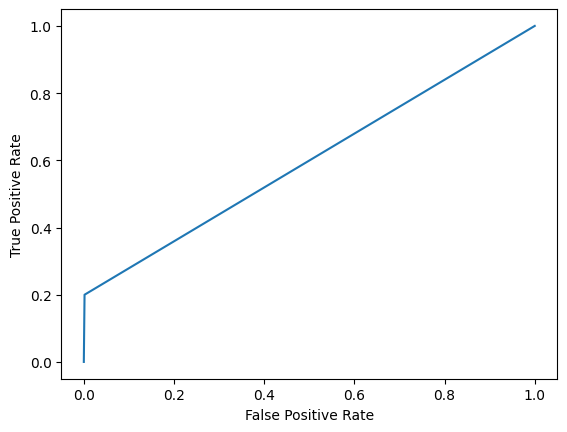

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [55]:
# Train data Analysis For Logistic Regression

In [56]:
y_pred_t= clf.predict(X_train)

In [57]:
print(classification_report(y_train, y_pred_t))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7399
           1       0.72      0.24      0.36       245

    accuracy                           0.97      7644
   macro avg       0.85      0.62      0.67      7644
weighted avg       0.97      0.97      0.97      7644



In [58]:
accuracy_score(y_train, y_pred_t)

0.9726582940868655

In [59]:
confusion_matrix(y_train,y_pred_t)

array([[7377,   22],
       [ 187,   58]])

# Support Vector Machines

In [60]:
from sklearn.svm import SVC

In [61]:
svm= SVC()

In [62]:
svm.fit(X_train,y_train)

SVC()

In [63]:
y_pred_svm= svm.predict(X_test)

In [64]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1861
           1       0.92      0.24      0.38        50

    accuracy                           0.98      1911
   macro avg       0.95      0.62      0.69      1911
weighted avg       0.98      0.98      0.97      1911



In [65]:
SVM =accuracy_score(y_test, y_pred_svm)
print('SVM :', SVM)

SVM : 0.9795918367346939


In [66]:
confusion_matrix(y_test, y_pred_svm)

array([[1860,    1],
       [  38,   12]])

In [67]:
roc_auc_score(y_test, y_pred_svm)

np.float64(0.6197313272434175)

Text(0, 0.5, 'True Positive Rate')

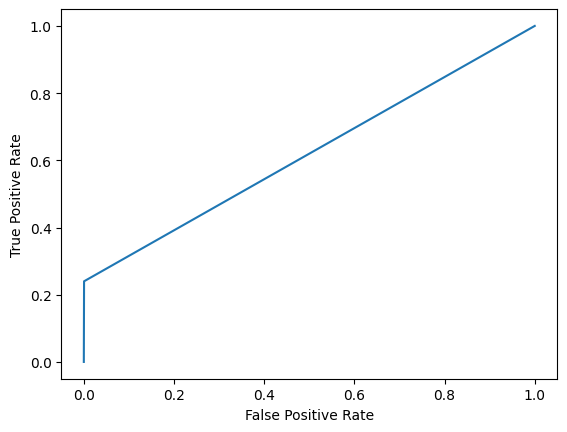

In [68]:
fpr, tpr, thresholds= roc_curve(y_test, y_pred_svm)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [69]:
# Train data

In [70]:
y_pred_svmt = svm.predict(X_train)

In [71]:
print(classification_report(y_train, y_pred_svmt))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7399
           1       0.91      0.36      0.52       245

    accuracy                           0.98      7644
   macro avg       0.94      0.68      0.75      7644
weighted avg       0.98      0.98      0.97      7644



In [72]:
accuracy_score(y_train, y_pred_svmt)

0.978414442700157

In [73]:
confusion_matrix(y_train, y_pred_svmt)

array([[7390,    9],
       [ 156,   89]])

In [74]:
roc_auc_score(y_train, y_pred_svmt)

np.float64(0.6810244627652384)

Text(0, 0.5, 'True Positive Rate')

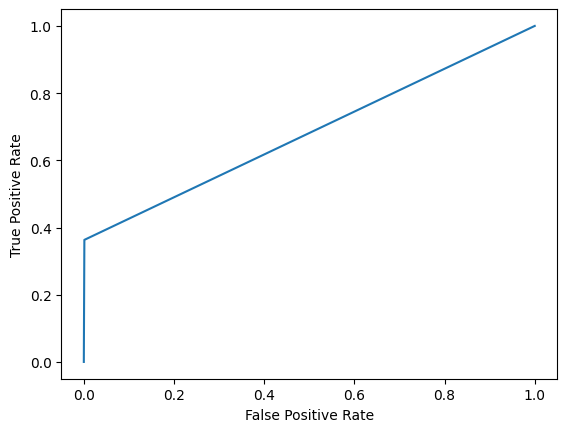

In [75]:
fpr, tpr, thresholds= roc_curve(y_train, y_pred_svmt)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
tree= DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
y_tree= tree.predict(X_test)

In [79]:
print(classification_report(y_test, y_tree))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1861
           1       0.57      0.62      0.60        50

    accuracy                           0.98      1911
   macro avg       0.78      0.80      0.79      1911
weighted avg       0.98      0.98      0.98      1911



In [80]:
decision_tree= accuracy_score(y_test, y_tree)
print('Decision Tree: ', decision_tree)

Decision Tree:  0.978021978021978


In [81]:
confusion_matrix(y_test, y_tree)

array([[1838,   23],
       [  19,   31]])

In [82]:
roc_auc_score(y_test, y_tree)

np.float64(0.803820526598603)

Text(0, 0.5, 'TPR')

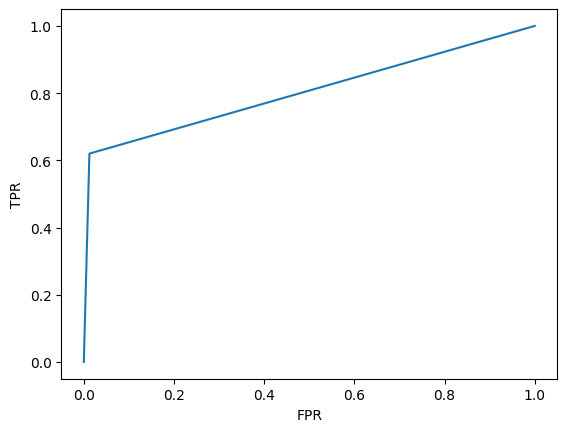

In [83]:
fpr, tpr,_ = roc_curve(y_test, y_tree)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

# Train Data

In [84]:
y_treet= tree.predict(X_train)

In [85]:
print(classification_report(y_train, y_treet))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7399
           1       1.00      1.00      1.00       245

    accuracy                           1.00      7644
   macro avg       1.00      1.00      1.00      7644
weighted avg       1.00      1.00      1.00      7644



In [86]:
accuracy_score(y_train, y_treet)

1.0

In [87]:
confusion_matrix(y_train, y_treet)

array([[7399,    0],
       [   0,  245]])

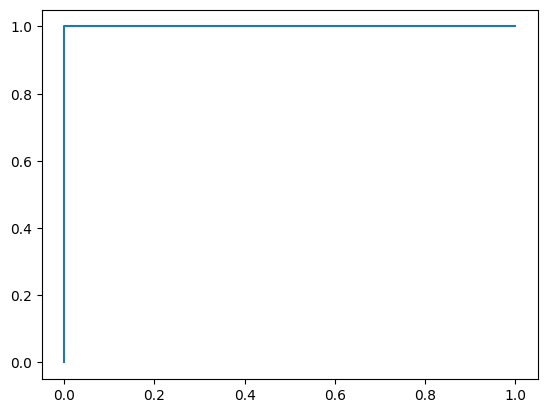

In [88]:
fpr, tpr, _= roc_curve(y_train, y_treet)
plt.plot(fpr, tpr)

In [89]:
roc_auc_score(y_train, y_treet)

np.float64(1.0)

# Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
forest= RandomForestClassifier()

In [92]:
forest.fit(X_train, y_train)

RandomForestClassifier()

In [93]:
y_forest= forest.predict(X_test)

In [94]:
print(classification_report(y_test, y_forest))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1861
           1       0.89      0.48      0.62        50

    accuracy                           0.98      1911
   macro avg       0.94      0.74      0.81      1911
weighted avg       0.98      0.98      0.98      1911



In [95]:
random_forest = accuracy_score(y_test, y_forest)
print('Random Forest: ', random_forest)

Random Forest:  0.9848246991104134


In [96]:
confusion_matrix(y_test, y_forest)

array([[1858,    3],
       [  26,   24]])

In [97]:
roc_auc_score(y_test, y_forest)

np.float64(0.7391939817302525)

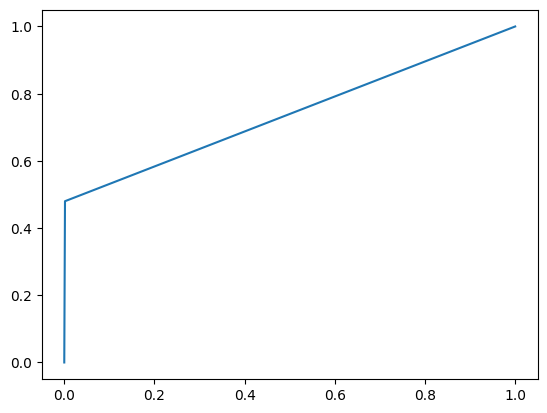

In [98]:
fpr, tpr, _= roc_curve(y_test, y_forest)
plt.plot(fpr, tpr)

# train data analysis

In [99]:
y_forestt= forest.predict(X_train)

In [100]:
print(classification_report(y_train, y_forestt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7399
           1       1.00      1.00      1.00       245

    accuracy                           1.00      7644
   macro avg       1.00      1.00      1.00      7644
weighted avg       1.00      1.00      1.00      7644



In [101]:
confusion_matrix(y_train, y_forestt)

array([[7399,    0],
       [   0,  245]])

In [102]:
print('Logistic Regession: ', Logistic)
print('SVM :', SVM)
print('Decision Tree: ', decision_tree)
print('Random Forest: ', random_forest)

Logistic Regession:  0.9774986917844061
SVM : 0.9795918367346939
Decision Tree:  0.978021978021978
Random Forest:  0.9848246991104134
